In [1]:
using InMemoryDatasets, StatisticalGraphics, DLMReader

**[Stacked Bar Chart, Diverging](https://observablehq.com/@d3/diverging-stacked-bar-chart)**

Reproducing an example from the [`D3`](http://d3js.org)`s examples collection.

Using the `baselineresponse` keyword argument to control the baseline of bars in each category.

┌ Warning: the last line is not ended with `end of line` character
└ @ DLMReader ~/.julia/packages/DLMReader/gB2Mj/src/reader.jl:449


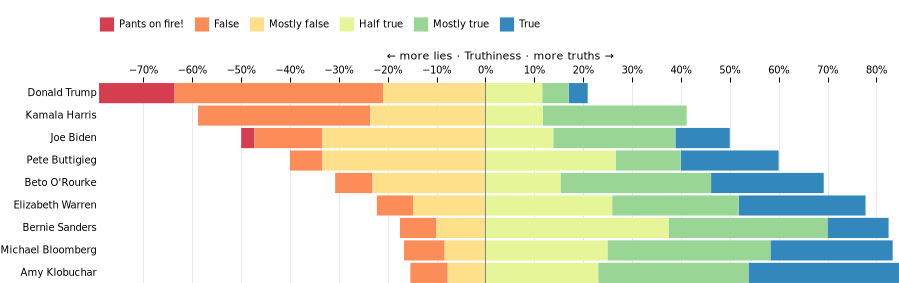

In [2]:
ds = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                              "..", "docs", "assets", "politifact.csv"))
ds_order = Dataset(ruling = ["true", "mostly-true", "half-true","barely-true", "false", "full-flop", "pants-fire"],
                  Ruling = ["True", "Mostly true", "Half true", "Mostly false", "False", "False", "Pants on fire!"],
                  order = 1:7,
                  weight = [0,0,0,-1,-1,-1,-1])
leftjoin!(ds, ds_order, on = :ruling)
sort!(ds, [:order], rev=true) # order Ruling
modify!(
        groupby(ds, :speaker),
        :count=> x->x ./ IMD.sum(x), # normalise counts
        [:count, :weight]=> byrow(prod) =>:baseline
        )

sgplot(
        ds,
        [
          Bar(y=:speaker, response=:count,
              group=:Ruling,
              grouporder=:data,
              baselineresponse=:baseline,
              baselinestat=IMD.sum,
              orderresponse=:baseline,
              orderstat=IMD.sum,
              outlinethickness=0.1,
              legend = :bar_leg,
              x2axis=true
            ),
          RefLine(values = 0.0, axis=:x2axis)
        ],
        x2axis=Axis(title = "← more lies · Truthiness · more truths →", domain = false, d3format="%", nice=false, grid=true),
        yaxis=Axis(title = "", domain = false, ticks = false),
        legend = Legend(name = :bar_leg, title = "", orient=:top, columns=0, size=200, columnspace = 10 ),
        width=800,
        height=200,
        groupcolormodel=["#d53e4f", "#fc8d59", "#fee08b", "#e6f598", "#99d594", "#3288bd"]
    )

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*